<a href="https://colab.research.google.com/github/rashidpatel04/OASIS-INFOBYTE-TASK-3-BY-RASHID.P/blob/main/OASIS_INFOBYTE_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP**

# **PROJECT 4 PROPOSAL LEVEL 1 BY RASHID PATEL: SENTIMENT ANALYSIS**

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB
Dataset after dropping missing values:
 None

Sentiment Distribution:
 category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


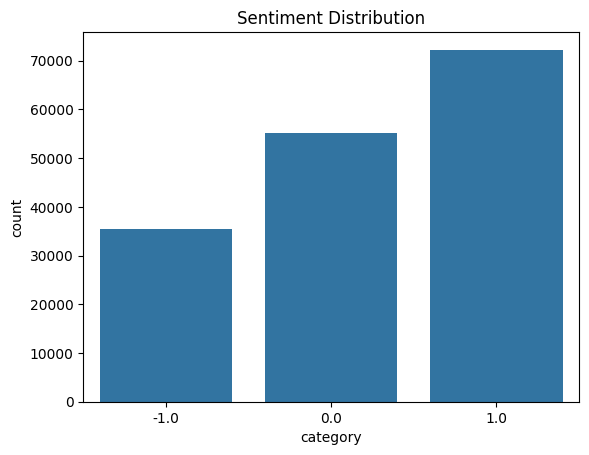

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Load the dataset
file_path = '/content/Twitter_Data.csv'
data = pd.read_csv(file_path)

# Step 2: Handle missing values
data = data.dropna()
print("Dataset after dropping missing values:\n", data.info())

# Step 3: Define features and target
X = data['clean_text']
y = data['category']

# Step 4: Exploratory Data Analysis
print("\nSentiment Distribution:\n", y.value_counts())
sns.countplot(x=y)
plt.title("Sentiment Distribution")
plt.show()

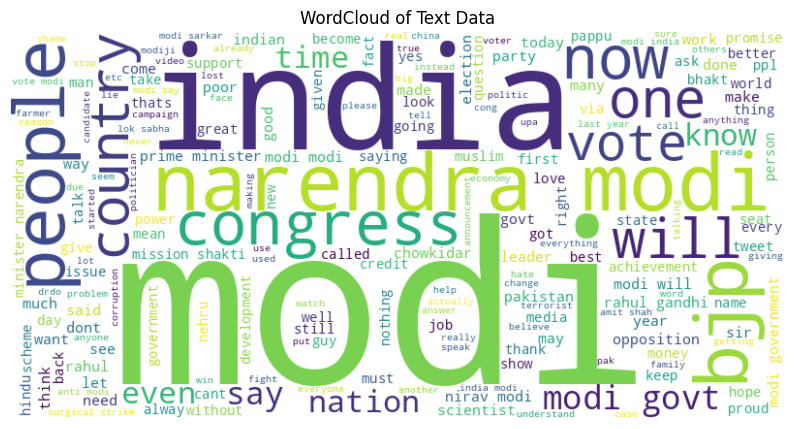

In [ ]:
# WordCloud for text data
all_words = ' '.join(X)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Text Data")
plt.show()

In [ ]:
# Step 5: Feature Engineering
tfidf = TfidfVectorizer(max_features=5000)
X_transformed = tfidf.fit_transform(X)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 7: Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7373442964962876

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.67      0.76     11067
         1.0       0.65      0.95      0.78     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



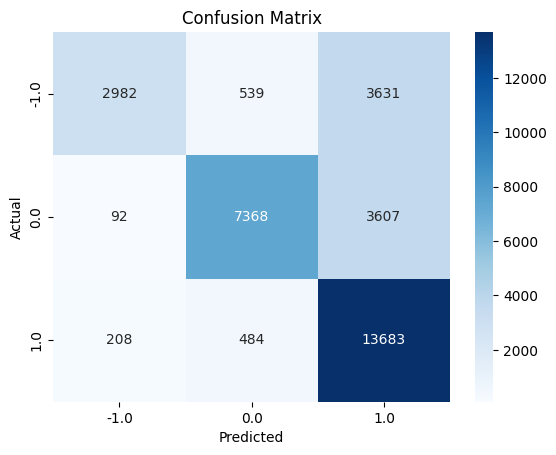

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

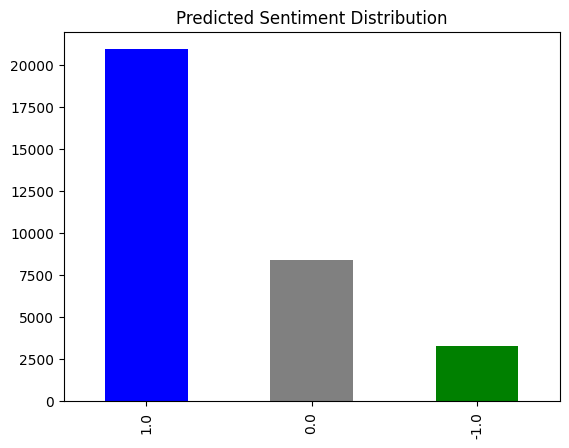

In [ ]:
# Step 9: Visualize Predicted Sentiment Distribution
predicted_sentiment_counts = pd.Series(y_pred).value_counts()
predicted_sentiment_counts.plot(kind='bar', color=['blue', 'gray', 'green'])
plt.title("Predicted Sentiment Distribution")
plt.show()